# Kaggler를 대상으로 한 설문조사
 <https://www.kaggle.com/rounakbanik/data-science-faq>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress Deprecation and Incorrect Usage Warnings
import warnings
warnings.filterwarnings('ignore')

# Expand cell and pandas width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# decoding error
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
print(mcq.shape)
mcq.columns

(16716, 228)


Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [5]:
mcq.head(5)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

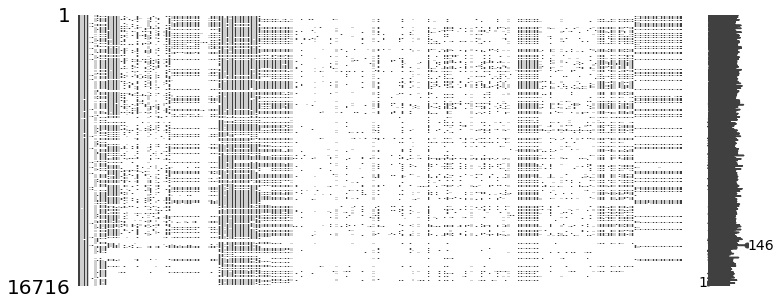

In [6]:
# NaN 데이터들을 시작화
import missingno as msno
msno.matrix(mcq, figsize=(12,5))

# 설문통계

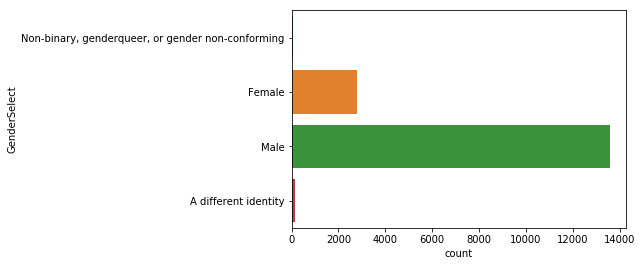

In [7]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)

남자가 월등히 많다

In [8]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df.head()

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [9]:
con_df['국가'] = con_df.index
con_df.head(1)

,Country,국가
United States,4197,United States


In [10]:
con_df.columns = ['응답 수', '국가']
con_df.head(1)

,응답 수,국가
United States,4197,United States


In [11]:
con_df = con_df.reset_index().drop('index', axis=1)
con_df

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


한국이 18번째로 많다.

In [12]:
# 연령에 대한 통계치
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

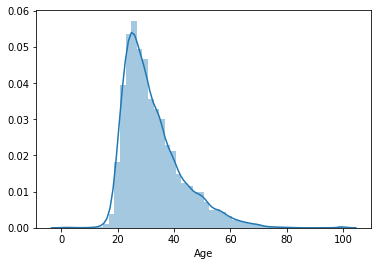

In [13]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 20 ~ 30 사이에 있다. 평균나이는 32세다.

# 학력

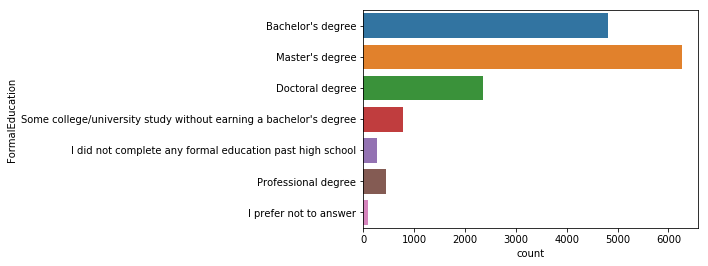

In [14]:
sns.countplot(y='FormalEducation', data=mcq)

학사보다 석사가 더 많다.

# 전공

In [15]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_count.head(2)

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220


In [16]:
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_percent.head(2)

,MajorSelect
Computer Science,0.331074
Mathematics or statistics,0.167156


In [17]:
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.head(2)

,MajorSelect_x,MajorSelect_y
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156


In [18]:
mcq_major_df.columns

Index(['MajorSelect_x', 'MajorSelect_y'], dtype='object')

In [19]:
mcq_major_df.columns = ['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴공이 33%로 가장 많았으며, 수학,통계, 공학 순이다.

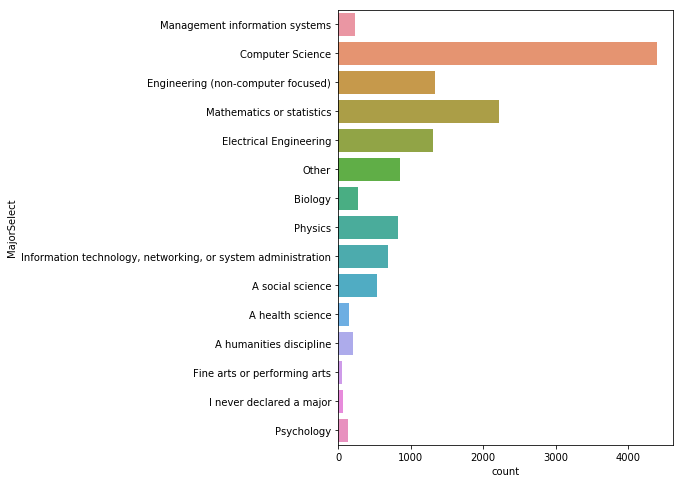

In [20]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

# 취업 여부

In [21]:
mcq_es_count = pd.DataFrame(mcq.EmploymentStatus.value_counts())
mcq_es_count.head(2)

,EmploymentStatus
Employed full-time,10897
"Not employed, but looking for work",2110


In [22]:
mcq_es_percent = pd.DataFrame(mcq.EmploymentStatus.value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.head(2)

,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226


In [23]:
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


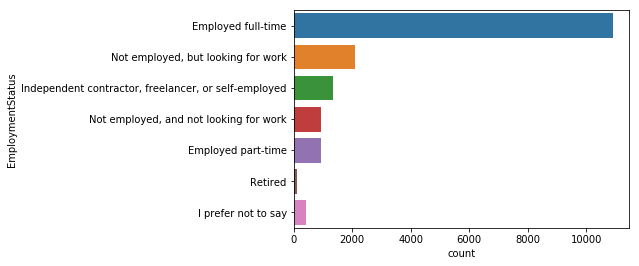

In [24]:
sns.countplot(y='EmploymentStatus', data=mcq)

65%가 full-time이었고 그 다음으로 많은게 구직자로 12%다.

# 프로그래밍 경험

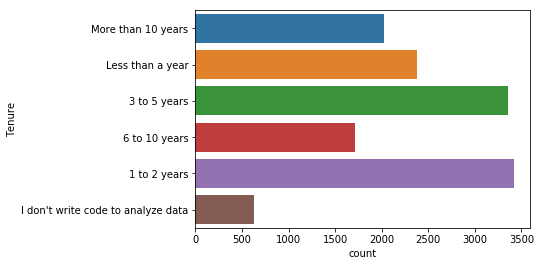

In [25]:
sns.countplot(y='Tenure', data=mcq)

대부분 5년 미만이었으며 1~2년이 가장 많다.

# 선호하는 프로그래밍 언어

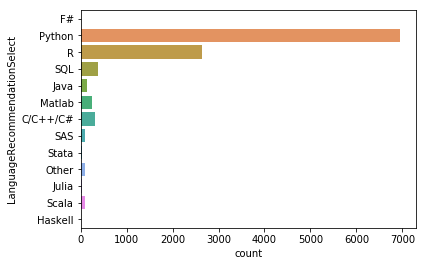

In [26]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

Python - R - SQL - C/C++/C# - Matlab 순이다.

# 현재 하고 있는 일

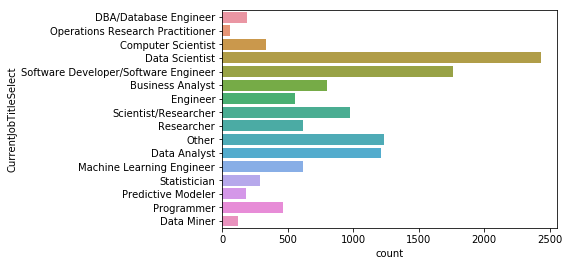

In [27]:
sns.countplot(y=mcq.CurrentJobTitleSelect)

In [28]:
# 현재하고 있는 일에 대한 전체 응답수
mcq[mcq.CurrentJobTitleSelect.notnull()].shape[0]

11830

(7158, 228)


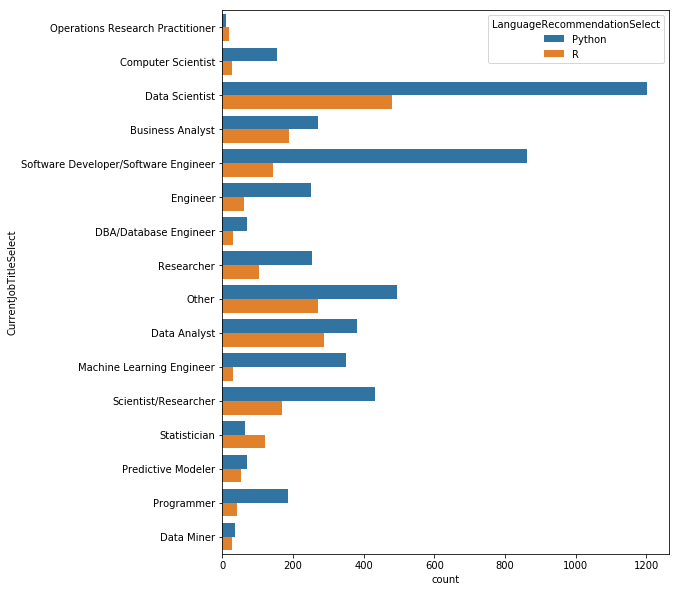

In [29]:
# 이중 Python, R을 선택한 사람의 수는
# 주의 : 각각의 비교문은 괄호() 로 감싸줘야만 bool 연산의 결과들을 합성할 수 있다.

data = (mcq[(mcq.CurrentJobTitleSelect.notnull()) &
     ((mcq.LanguageRecommendationSelect == 'Python') |
      (mcq.LanguageRecommendationSelect == 'R'))])

print(data.shape)

plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

대부분의 직업군에서 R보다 Python을 더 선호한다. R을 더 선호하는 직군은 Operations Research Practitioner 와 Statistician(통계학자) 들이다. 

# 한국내에서의 통계

In [30]:
korea = mcq.loc[mcq.Country == 'South Korea']
print('The number of interviewees in Korea: ', korea.shape[0])

The number of interviewees in Korea:  194


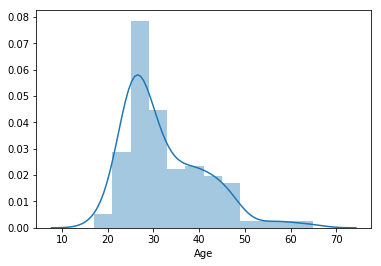

In [31]:
sns.distplot(korea.Age.dropna())

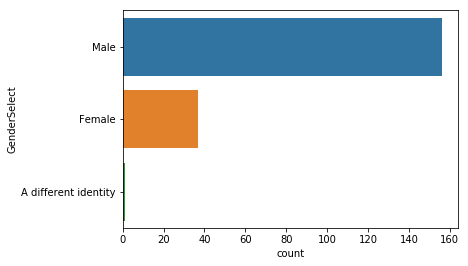

In [32]:
sns.countplot(y='GenderSelect', data=korea)

Text(0.5,1,'Korea Male')

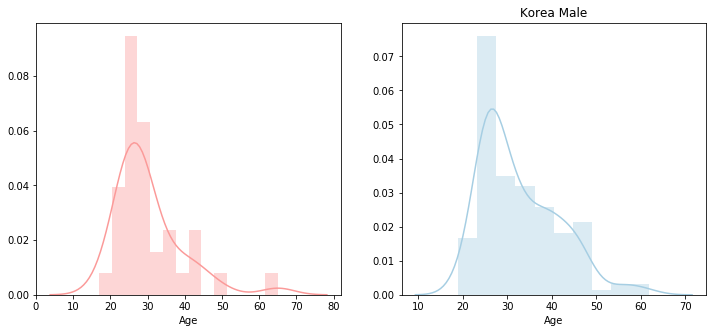

In [33]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea.Age.loc[korea.GenderSelect == 'Female'].dropna(), norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('Korea Female')

sns.distplot(korea.Age.loc[korea.GenderSelect == 'Male'].dropna(), norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
plt.title('Korea Male')

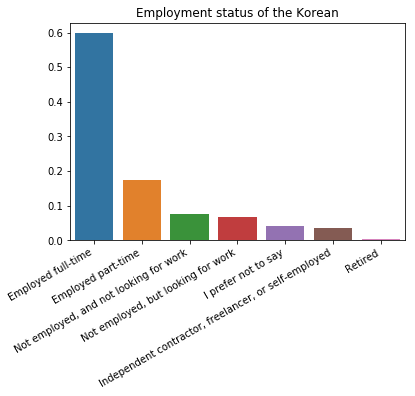

In [34]:
sns.barplot(x=korea.EmploymentStatus.unique(), y=korea.EmploymentStatus.value_counts(normalize=True))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

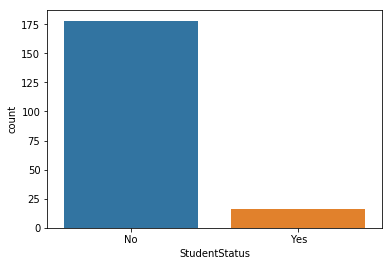

In [35]:
korea.StudentStatus = korea.StudentStatus.fillna('No')
sns.countplot(x='StudentStatus', data=korea)

# 데이터사이언스 툴

In [36]:
mcq_ml_tool_count = pd.DataFrame(mcq.MLToolNextYearSelect.value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq.MLToolNextYearSelect.value_counts(normalize=True))
mcq_ml_tool = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True)
mcq_ml_tool.columns = ['응답 수', '비율']
mcq_ml_tool.head()

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916


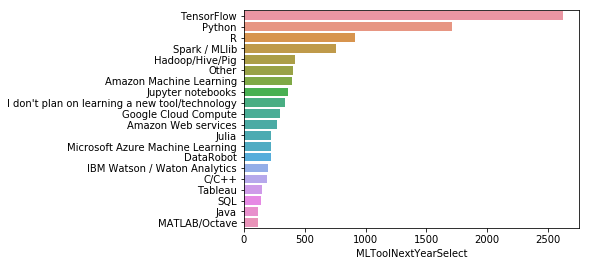

In [37]:
data = mcq.MLToolNextYearSelect.value_counts().head(20)
sns.barplot(y=data.index, x=data) # DataFrame을 넣으면 에러가 남

# DataScience Method

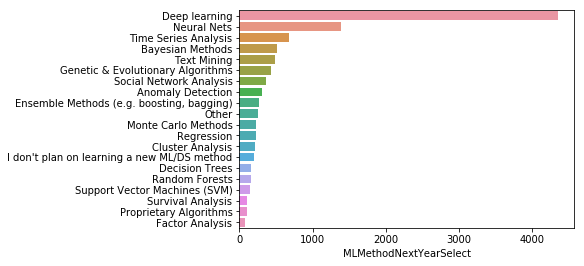

In [38]:
data = mcq.MLMethodNextYearSelect.value_counts().head(20)
sns.barplot(y=data.index, x=data)

# Learning Platform Select

In [39]:
mcq.LearningPlatformSelect = mcq.LearningPlatformSelect.astype('str').apply(lambda x: x.split(','))

In [40]:
mcq.LearningPlatformSelect.head(20)

0     [College/University, Conferences, Podcasts, Tr...
1                                              [Kaggle]
2     [Arxiv, College/University, Kaggle, Online cou...
3     [Blogs, College/University, Conferences, Frien...
4                [Arxiv, Conferences, Kaggle, Textbook]
5     [Kaggle, Online courses, Stack Overflow Q&A, T...
6     [Arxiv, Blogs, Kaggle, Personal Projects, Text...
7     [College/University, Kaggle, Online courses, S...
8     [Blogs, Company internal community, Conference...
9     [Arxiv, Blogs, Conferences, Kaggle, Non-Kaggle...
10                             [Kaggle, Online courses]
11    [Kaggle, Non-Kaggle online communities, Person...
12    [College/University, Conferences, Kaggle, Onli...
13                                                [nan]
14    [Blogs, Conferences, Kaggle, Online courses, T...
15    [Kaggle, Personal Projects, Podcasts, Stack Ov...
16                                                [nan]
17                                              

In [41]:
s = mcq.apply(lambda x: pd.Series(x.LearningPlatformSelect), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

In [42]:
data = s[s != 'nan'].value_counts().head(20)
data

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
Newsletters                      1112
Company internal community        996
Other                             518
Trade book                        337
Name: platform, dtype: int64

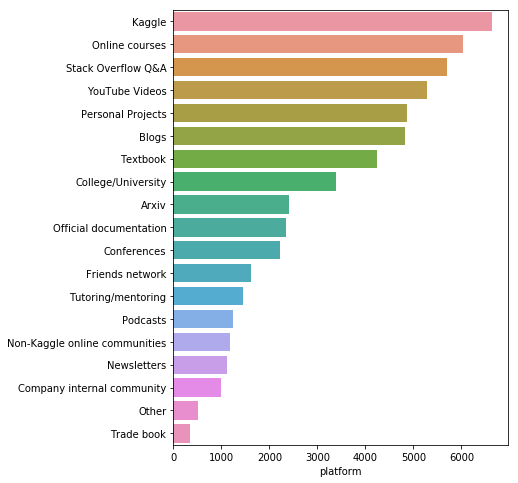

In [43]:
plt.figure(figsize=(6,8))
sns.barplot(y=data.index, x=data)

상위 4개가 online에서 하는 학습이다. 의외로 대학 학위/강의의 비중이 그렇게 높지않다.

In [44]:
# 설문내용과 누구에게 물어봤는지
qc = question.loc[question.Column.str.contains('LearningCategory')]
qc

,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [45]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]
use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [46]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
mcq[use_features[0]].value_counts()

Very useful        1316
Somewhat useful    1038
Not Useful           37
Name: LearningPlatformUsefulnessArxiv, dtype: int64

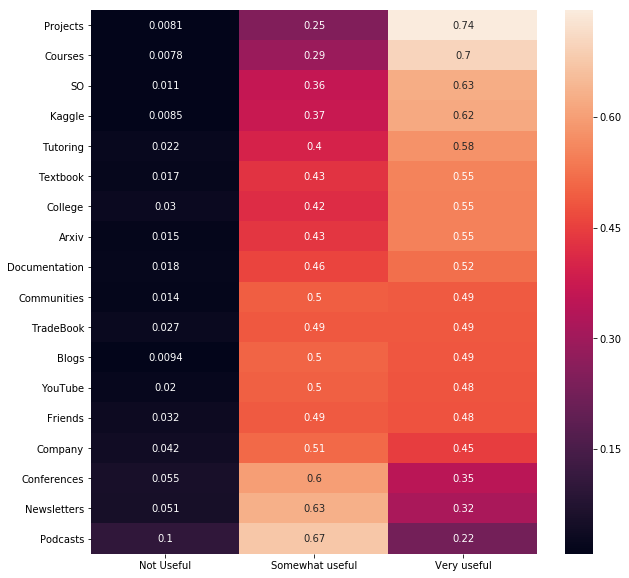

In [47]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    #fdf[feature] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# hitmap으로 표시
plt.figure(figsize=(10,10))
sns.heatmap(fdf, annot=True)

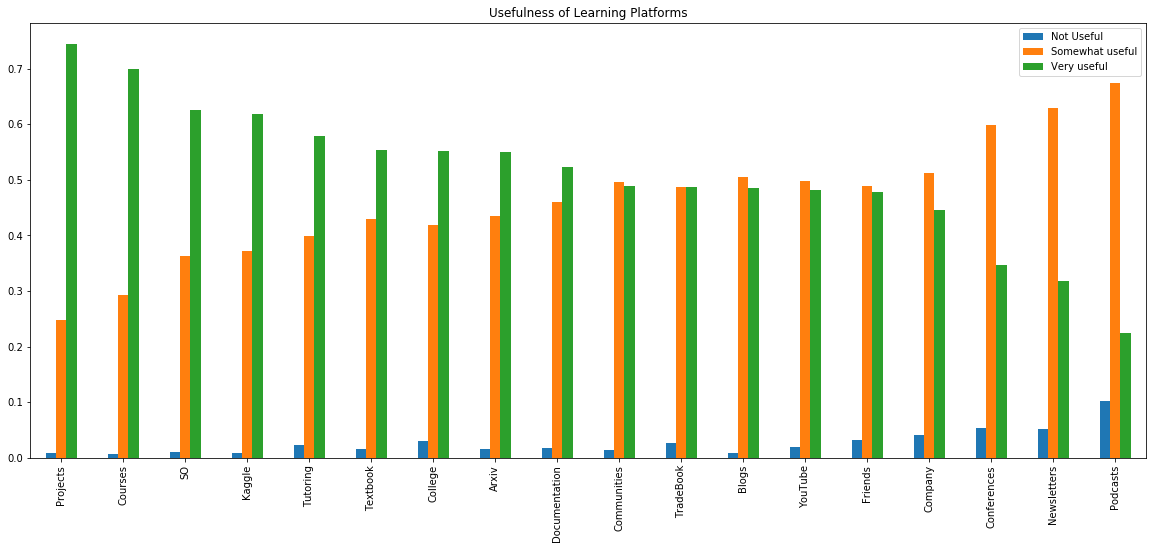

In [48]:
# 유용함의 정도를 플랫폼 별로 그룹화
fdf.plot(kind='bar', figsize=(20, 8), title='Usefulness of Learning Platforms')

In [49]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [50]:
mcq[cat_features[0]].head()

0     0.0
1    10.0
2    20.0
3    30.0
4    60.0
Name: LearningCategorySelftTaught, dtype: float64

In [51]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
cdf

{'Kaggle': 5.531433795520342,
 'OnlineCourses': 27.375514246533598,
 'Other': 1.795939644111807,
 'SelftTaught': 33.36677092074147,
 'University': 16.98860691967688,
 'Work': 15.217593341468994}

In [52]:
cdf = pd.Series(cdf)
cdf

Kaggle            5.531434
OnlineCourses    27.375514
Other             1.795940
SelftTaught      33.366771
University       16.988607
Work             15.217593
dtype: float64

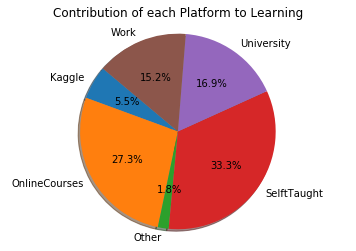

In [53]:
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

# 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가 ?

In [54]:
# 설문내용과 누구에게 물어봤는지 찾아봄
qc = question.loc[question.Column.str.contains('HardwarePersonalProjectsSelect')]
qc

,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [55]:
mcq[mcq.HardwarePersonalProjectsSelect.notnull()].HardwarePersonalProjectsSelect.head()

2                                Basic laptop (Macbook)
7     Basic laptop (Macbook),Gaming Laptop (Laptop +...
10    Laptop or Workstation and local IT supported s...
12       Basic laptop (Macbook),Traditional Workstation
18                               Basic laptop (Macbook)
Name: HardwarePersonalProjectsSelect, dtype: object

In [56]:
mcq[mcq.HardwarePersonalProjectsSelect.notnull()].HardwarePersonalProjectsSelect.shape

(4206,)

In [57]:
mcq.HardwarePersonalProjectsSelect = mcq.HardwarePersonalProjectsSelect.astype('str').apply(lambda x: x.split(','))

In [58]:
s = mcq.apply(lambda x: pd.Series(x.HardwarePersonalProjectsSelect), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [59]:
s = s[s!= 'nam']

In [60]:
s.head()

0                       nan
1                       nan
2    Basic laptop (Macbook)
3                       nan
4                       nan
Name: hardware, dtype: object

In [61]:
pd.DataFrame(s.value_counts())

,hardware
nan,12510
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174


# 데이터 사이언스 공부에 얼마나 많은 시간을 사용하나 ?

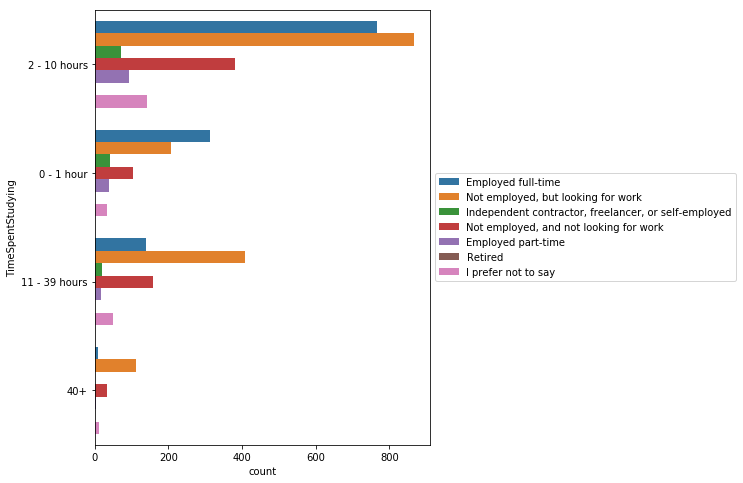

In [62]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue='EmploymentStatus') \
    .legend(loc='center left', bbox_to_anchor=(1, 0.5))

10시간 이하의 답변이 가장 많다. full-time으로 일하는 사람은 10시간 이하의 답변이 가장 많고, 구직중인 사람들은 39시간 이하도 높은 비율로 있다.

In [63]:
full_time = pd.DataFrame(mcq.loc[mcq.EmploymentStatus == 'Employed full-time']) #.TimeSpentStudying.value_counts())
#full_time

In [64]:
looking_for_job = pd.DataFrame(mcq.loc[mcq.EmploymentStatus == 'Not employed, but looking for work']) #.TimeSpentStudying.value_counts())
#looking_for_job

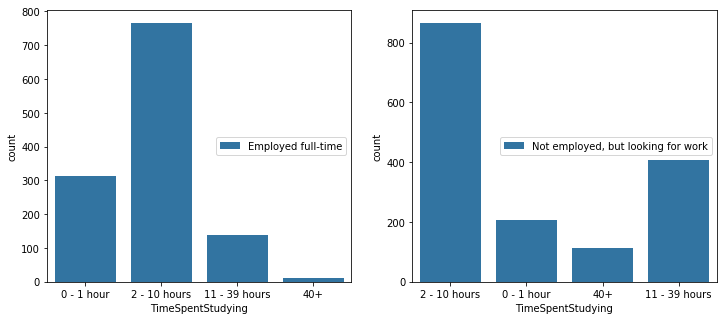

In [65]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12, 5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(loc='center right', bbox_to_anchor=(1, 0.5))
sns.countplot(x='TimeSpentStudying', data=looking_for_job, hue='EmploymentStatus', ax=ax2).legend(loc='center right', bbox_to_anchor=(1, 0.5))


# 블로그, 팟캐스트, 수업 등 추천할 만한 것

In [66]:
mcq.BlogsPodcastsNewslettersSelect = mcq.BlogsPodcastsNewslettersSelect.astype('str').apply(lambda x: x.split(','))
mcq.BlogsPodcastsNewslettersSelect.head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [67]:
s = mcq.apply(lambda x: pd.Series(x.BlogsPodcastsNewslettersSelect), axis=1).stack().reset_index(level=1, drop=True)
s.name ='platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [68]:
s = s[s != 'nan'].value_counts().head(20)

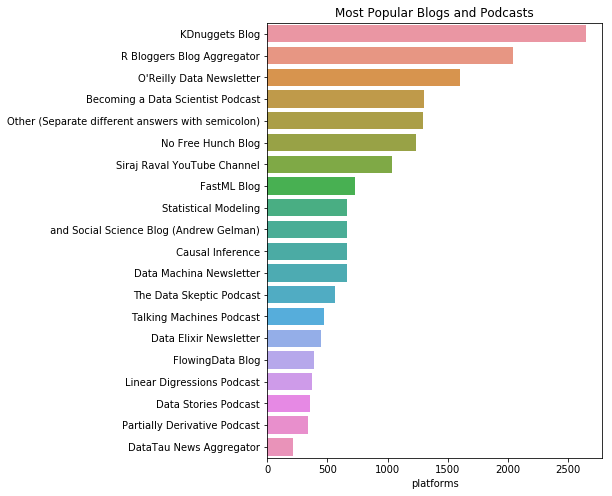

In [69]:
plt.figure(figsize=(6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

- kdnuggets : <https://www.kdnuggets.com/>
- Becoming a Data Scientist : <https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q>
- Siraj Raval : <https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A>

In [70]:
mcq.CoursePlatformSelect = mcq.CoursePlatformSelect.astype('str').apply(lambda x: x.split(','))
mcq.CoursePlatformSelect.head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [71]:
t = mcq.apply(lambda x: pd.Series(x.CoursePlatformSelect), axis=1) #.stack().reset_index(level=1, drop=True)
t.head(10)

,0,1,2,3,4
0,nan,NaN,NaN,NaN,NaN
1,nan,NaN,NaN,NaN,NaN
2,Coursera,edX,NaN,NaN,NaN
3,nan,NaN,NaN,NaN,NaN
4,nan,NaN,NaN,NaN,NaN
5,nan,NaN,NaN,NaN,NaN
6,nan,NaN,NaN,NaN,NaN
7,Coursera,NaN,NaN,NaN,NaN
8,nan,NaN,NaN,NaN,NaN
9,nan,NaN,NaN,NaN,NaN


In [72]:
t = t.stack()
t.head(10)

0  0         nan
1  0         nan
2  0    Coursera
   1         edX
3  0         nan
4  0         nan
5  0         nan
6  0         nan
7  0    Coursera
8  0         nan
dtype: object

In [73]:
t = t.reset_index(level = 1, drop=True)
t.head(10)

0         nan
1         nan
2    Coursera
2         edX
3         nan
4         nan
5         nan
6         nan
7    Coursera
8         nan
dtype: object

In [74]:
t.name = 'courses'
t = t[t != 'nan'].value_counts()
t

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
Name: courses, dtype: int64

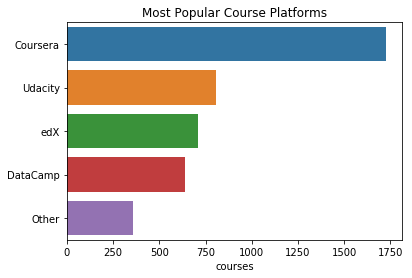

In [75]:
plt.title('Most Popular Course Platforms')
sns.barplot(y=t.index, x=t)

# 데이터 사이언스 직무에서 가장 중요하게 생각되는 스킬

In [76]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 and x.find('JobSkillImportanceOther') == -1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [77]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
    
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [78]:
jdf = pd.DataFrame(jdf)
jdf

,BigData,Degree,EnterpriseTools,KaggleRanking,MOOC,Python,R,SQL,Stats,Visualizations
Necessary,0.379929,0.279867,0.144829,0.118863,0.107255,0.645994,0.414807,0.434224,0.513889,0.455392
Nice to have,0.574065,0.598107,0.564970,0.677261,0.606994,0.327214,0.513945,0.491778,0.457576,0.490820
Unnecessary,0.046006,0.122026,0.290200,0.203876,0.285752,0.026792,0.071247,0.073998,0.028535,0.053788


In [79]:
jdf = jdf.transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
EnterpriseTools,0.144829,0.564970,0.290200
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
Stats,0.513889,0.457576,0.028535
Visualizations,0.455392,0.490820,0.053788


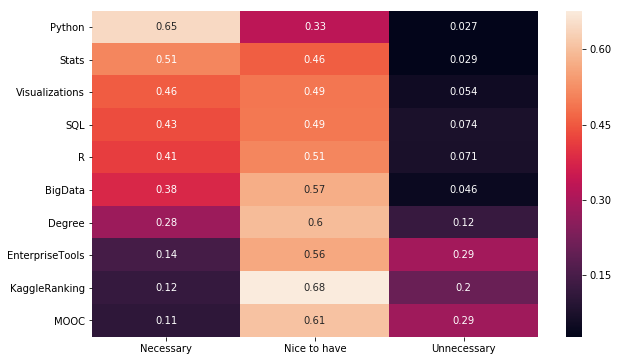

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values('Necessary', ascending=False), annot=True)

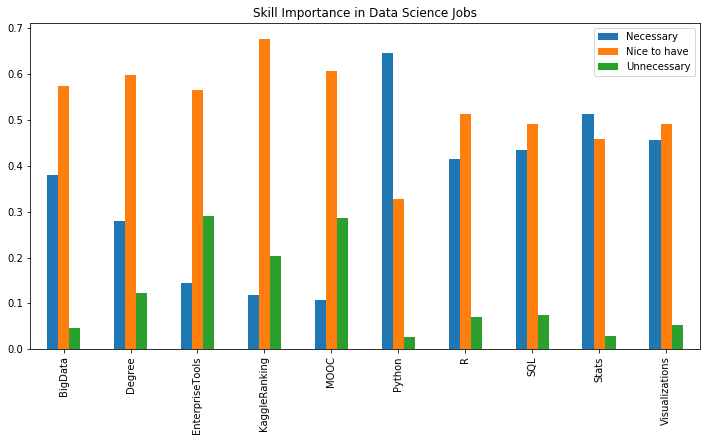

In [81]:
jdf.plot(kind='bar', figsize=(12,6), title='Skill Importance in Data Science Jobs')

# 데이터 과학자의 평균 급여

In [82]:
mcq[mcq.CompensationAmount.notnull()].shape

(5224, 228)

In [83]:
mcq.CompensationAmount = mcq.CompensationAmount.str.replace(',','').replace('-','')
mcq.CompensationAmount.head()

0       NaN
1       NaN
2       NaN
3    250000
4       NaN
Name: CompensationAmount, dtype: object

In [84]:
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
rates.head()

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [85]:
salary = mcq[['CompensationAmount', 'CompensationCurrency', 'GenderSelect', 'Country', 'CurrentJobTitleSelect']].dropna()
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer


In [86]:
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304


In [87]:
salary['Salary'] = pd.to_numeric(salary.CompensationAmount) * salary.exchangeRate
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [88]:
salary.Salary.describe()

count    4.363000e+03
mean     6.606009e+06
std      4.284143e+08
min     -7.351631e+01
25%      2.046960e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: Salary, dtype: float64

In [89]:
salary.Salary.dropna().astype(int).min()

-73

In [90]:
salary = salary[salary['Salary'].notnull()]

In [91]:
salary = salary[(salary.Salary < 500000) & (salary.Salary > 0)]

In [92]:
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


Text(0.5,1,'Salary Distribution')

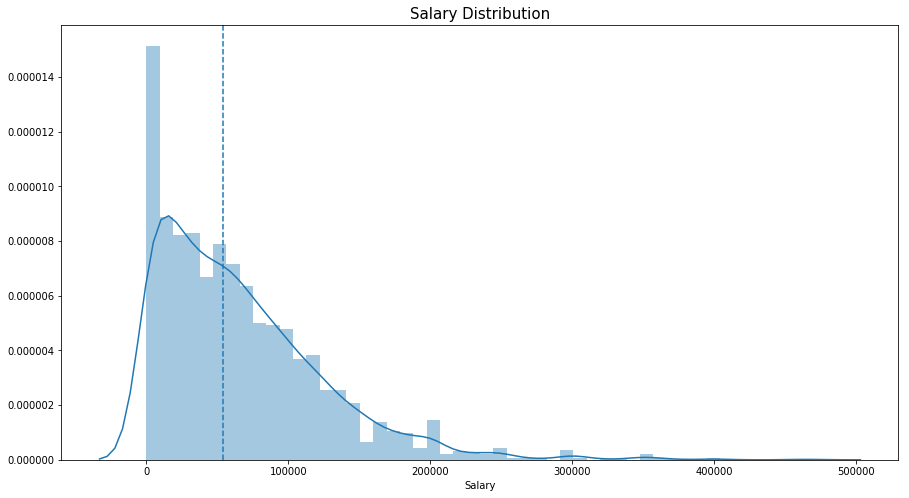

In [93]:
plt.subplots(figsize=(15,8))
sns.distplot(salary.Salary)
plt.axvline(salary.Salary.median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

Text(0.5,1,'Highest Salary Paying Countries')

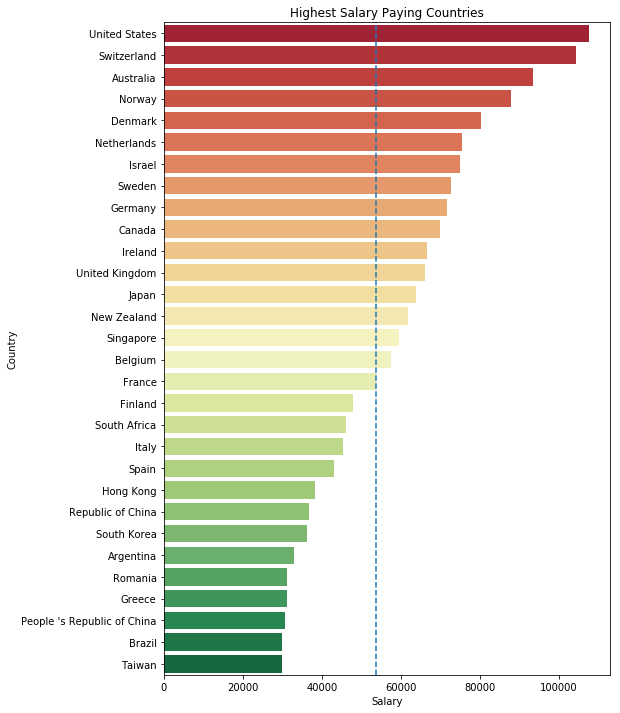

In [94]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby('Country').Salary.median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary', sal_coun.index, data=sal_coun, palette='RdYlGn')

plt.axvline(salary.Salary.median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

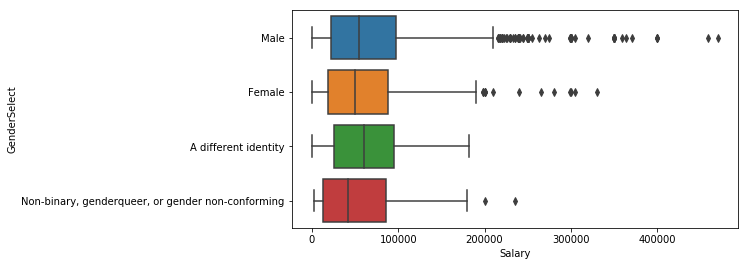

In [95]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

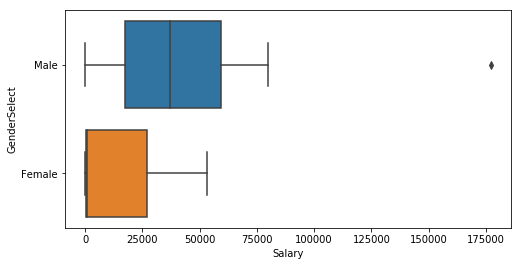

In [96]:
salary_korea = salary.loc[(salary.Country == 'South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_korea)

In [97]:
salary_korea.shape

(26, 8)

In [98]:
salary_korea[salary_korea.GenderSelect == 'Female'] 

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [99]:
salary_korea_male = salary_korea[salary_korea.GenderSelect == 'Male']
salary_korea_male.Salary.describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [100]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


# 개인 프로젝트용 학습 데이터를 어디에서 얻나요 ?

In [101]:
mcq.PublicDatasetsSelect = mcq.PublicDatasetsSelect.astype(str).apply(lambda x: x.split(','))
mcq.PublicDatasetsSelect.head()

0    [Dataset aggregator/platform (i.e. Socrata/Kag...
1    [Dataset aggregator/platform (i.e. Socrata/Kag...
2    [Dataset aggregator/platform (i.e. Socrata/Kag...
3          [I collect my own data (e.g. web-scraping)]
4                                             [GitHub]
Name: PublicDatasetsSelect, dtype: object

In [102]:
q = mcq.apply(lambda x: pd.Series(x.PublicDatasetsSelect), axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'
q = q[q != 'nam'].value_counts()
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
nan,5920
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


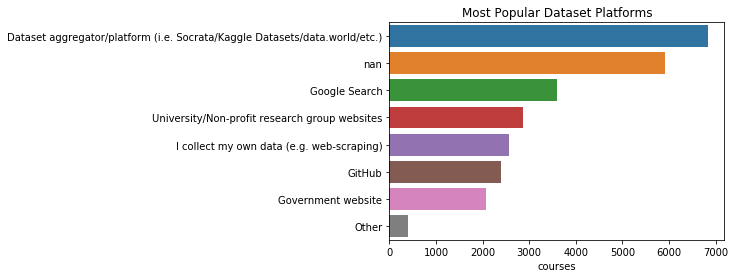

In [103]:
plt.title('Most Popular Dataset Platforms')
sns.barplot(y=q.index, x=q)

# 주관식 응답을 읽어옴

In [104]:
ff = pd.read_csv('data/freeformResponses.csv', encoding="ISO-8859-1")
ff.shape

(16716, 62)

In [105]:
qc = question.loc[question.Column.str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.head()

(1, 3)


22    What is your biggest challenge with the public...
Name: Question, dtype: object

# 공개된 데이터셋을 다루는데 가장 어려운 점

In [106]:
ppcff = ff.PersonalProjectsChallengeFreeForm.value_counts().head(20)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
Size,9
-,9


# 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은 ?

In [121]:
def get_columns_contains_word(df, word):
    return [x for x in df.columns if x.find(word) != -1]

In [122]:
time_features = get_columns_contains_word(mcq, 'Time')
time_features

['LearningDataScienceTime',
 'TimeSpentStudying',
 'EmployerMLTime',
 'WorkMethodsFrequencyTimeSeriesAnalysis',
 'TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect',
 'JobHuntTime']

In [123]:
time_features = time_features[4:-1]
time_features

['TimeGatheringData',
 'TimeModelBuilding',
 'TimeProduction',
 'TimeVisualizing',
 'TimeFindingInsights',
 'TimeOtherSelect']

In [114]:
def get_series_from_columns(df, columns, prefix, method):
    """
    
    """
    result = {}
    for column in columns:
        result[column[len(prefix):]] = method(df[column])
        
    return pd.Series(result)

In [115]:
tdf = get_series_from_columns(mcq, time_features, 'Time', lambda x: x.mean())
tdf

FindingInsights    13.094776
GatheringData      36.144754
ModelBuilding      21.268066
OtherSelect         2.396247
Production         10.806372
Visualizing        13.869372
dtype: float64

In [116]:
type(tdf)

pandas.core.series.Series

In [117]:
def pie_chart_from_pandas_series(series, title):
    plt.pie(series, labels=series.index, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

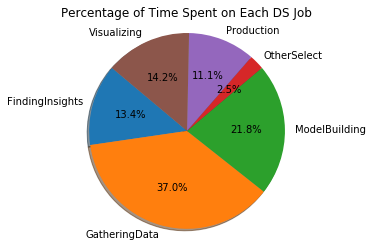

In [118]:
pie_chart_from_pandas_series(tdf, 'Percentage of Time Spent on Each DS Job')

데이터 수집하는 일, 모델 구축, 시각화, 인사이트 찾기 의 순이다.

# 데이터 사이언스 직업을 찾는데 가장 고려해야 할 요소는 ?

In [119]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question.Column.str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [124]:
job_factors = get_columns_contains_word(mcq, 'JobFactor')
job_factors

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

In [128]:
def get_value_counts_from_columns(df, columns, prefix, step_func=None, post_func=None):
    result = {}
    for column in columns:
        a = df[column].value_counts()
        if step_func is not None:
            a = step_func(a)
        result[column[len(prefix):]] = a
        
    result = pd.DataFrame(result)
        
    return result if post_func is None else post_func(result)

value_counts_mean = lambda x: x/x.sum()
dataframe_transpose = lambda x: x.transpose()

In [129]:
jfdf = get_value_counts_from_columns(mcq, job_factors, 'JobFactor', value_counts_mean, dataframe_transpose)

In [130]:
jfdf

,Not important,Somewhat important,Very Important
Commute,0.132289,0.522193,0.345518
CompanyFunding,0.149809,0.562298,0.287892
Department,0.165105,0.482728,0.352166
Diversity,0.249853,0.487390,0.262757
ExperienceLevel,0.092232,0.494908,0.412860
Impact,0.115793,0.490866,0.393341
Industry,0.180698,0.505720,0.313582
Languages,0.071367,0.443165,0.485468
LeaderReputation,0.209350,0.520141,0.270509
Learning,0.024500,0.252323,0.723177


In [134]:
def heat_map(df, sort_value, ascending=True, figsize=None):
    if figsize is not None:
        plt.figure(figsize=figsize)
    sns.heatmap(df.sort_values(sort_value, ascending=ascending), annot=True)

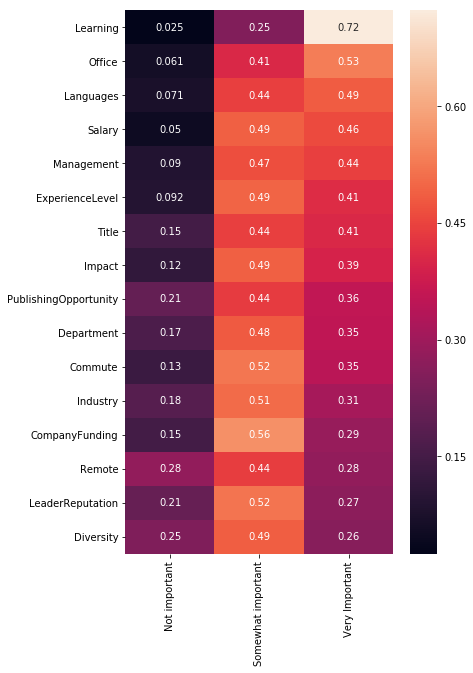

In [135]:
heat_map(jfdf, 'Very Important', False, (6,10))

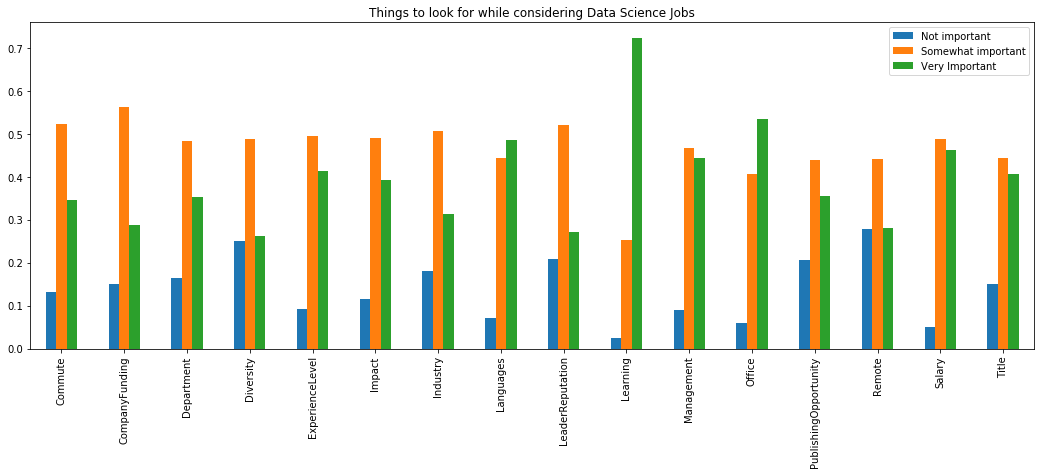

In [137]:
jfdf.plot(kind='bar', figsize=(18,6), title='Things to look for while considering Data Science Jobs')

데이터 사이언스로 직업을 찾을데 중요하게 보는 요소는 배울수 있는 곳읹, 근무환경, 사용언어, 급여, 경영상태, 경력 순이다.

# 데이터 사이언스가 되기 위해 학위가 중요할까 ?

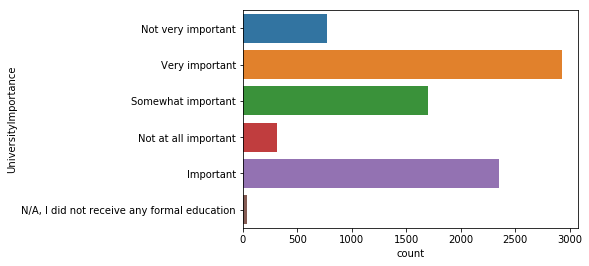

In [138]:
sns.countplot(y='UniversityImportance', data=mcq)

In [141]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq.UniversityImportance.value_counts().head(5)
top_uni    

Very important          2925
Important               2347
Somewhat important      1695
Not very important       772
Not at all important     317
Name: UniversityImportance, dtype: int64

In [149]:
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq.Age.notnull()) & (mcq.UniversityImportance == uni)].Age)
    

In [150]:
group_labels = top_uni.index
fig = fig_fact.create_distplot(top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

20~30 대는 학위가 중요하다고 대답하는 비율이 비교적 다른 나이대에 비해 높게 나타났으며, 30~ 50대는 그 비중이 비교적 다른곳 보다는 낮다.

# 어디에서부터 데이터 사이언스를 시작해야 할까요 ?

In [151]:
mcq[mcq.FirstTrainingSelect.notnull()].shape

(14712, 228)

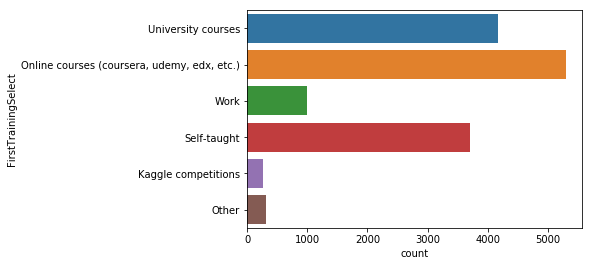

In [152]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

온라인 강좌, 대학교육, 독학 순이다.

# 데이터 사이언티스트 이력서에서 가장 즁요한 것은 ?

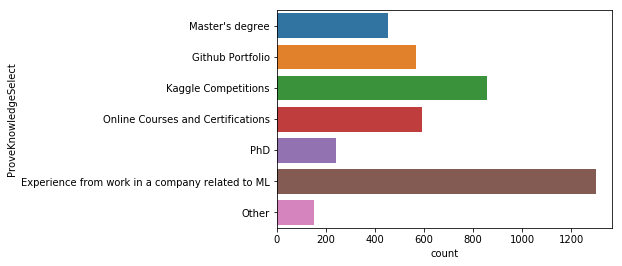

In [154]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

ML 관련 직무가 가장 높았으며, 캐글 경진대회 순위, 온라인 강좌 수료증, 깃헙 포트폴리오 순이다.

# 머신러닝 알고리즘 사용에 수학이 필요한가 ?

In [157]:
# 설문내용과 누구에게 물어봤는지 찾아봄
qc = question.loc[question.Column.str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [158]:
mcq[mcq.AlgorithmUnderstandingLevel.notnull()].shape

(7410, 228)

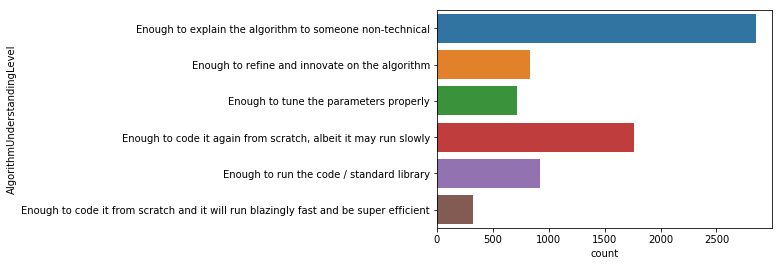

In [159]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

기술과 관련없는 사람에게 설명할 수 있을 정도면 된다는 응답이 가장 많았으며, 더디더라도 밑바닥부터 코드 작성이 가능한 정도가 그 다음이었다.

# 어디에서 일을 찾아야 할까?

In [160]:
question.loc[question.Column.str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


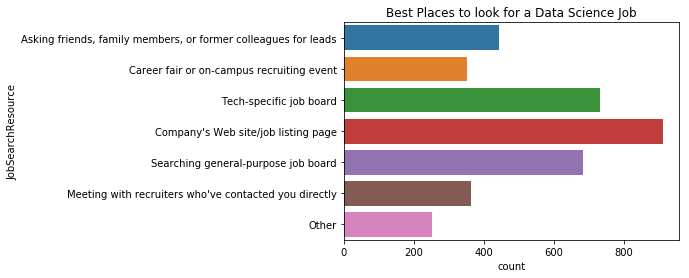

In [161]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq)

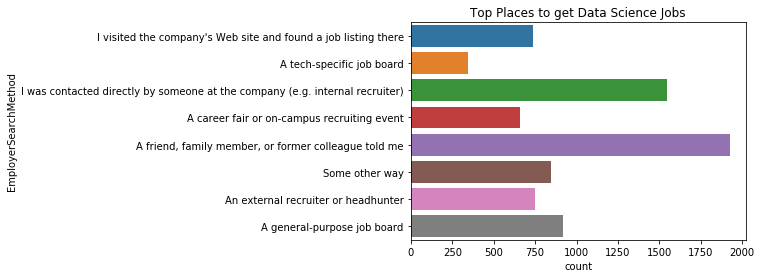

In [162]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

구직자들은 회사 웹사이트나 구직사이트, 특정기술의 채용게시판, 일반 채용게시판, 지인들 순으로 많이 찾고 있었으며,  
채용자는 지인추천, 리쿠르터, 게시판 순이었다.

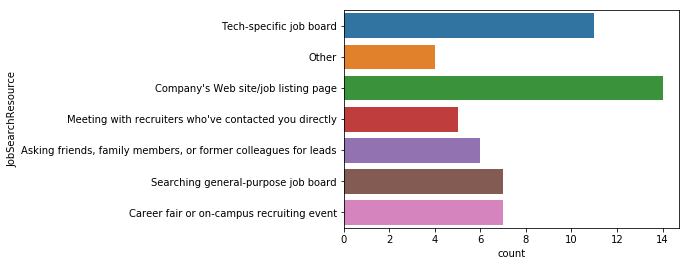

In [163]:
sns.countplot(y='JobSearchResource', data=korea)

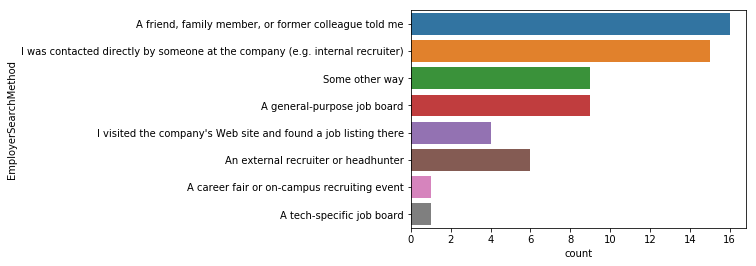

In [164]:
sns.countplot(y='EmployerSearchMethod', data=korea)

한국에서도 별반 다르지 않다.